In [1]:
import numpy as np
import sys
import pyDOE as pyDOE
import corner
from sympy import symbols, Eq

In [2]:
# Parameters
n_params = 1
n_samples = 1000

# parameter ranges:
h = np.linspace(0.50, 1.0, n_samples)
#ombh2 = np.linspace(0.0150, 0.0350, n_samples)
#omch2 = np.linspace(0.050, 0.250, n_samples)
#ns = np.linspace(0.6, 1.1, n_samples)
#z = np.linspace(0.0, 100.0, n_samples)
#lnAs = np.linspace(0.5, 1.0, n_samples)                  # setting As, e.g: pars.InitPower.set_params(As=2e-9, ns=0.965)
#w = np.linspace(-1.0, 1.0,  n_samples)                   # eqn of state parameter
#omnuh2 = np.linspace(, n_samples)
#N_eff =  np.linspace(1.00, 3.00,  n_samples)

In [9]:
# LHS Grid
AllParams = np.vstack([h])
lhd = pyDOE.lhs(n_params, samples=n_samples, criterion=None)
index = (lhd*n_samples).astype(int)

AllCombs = np.zeros((n_samples, n_params))
AllCombs[:, 0] = AllParams[0][index[:, 0]]
    
print(np.shape(AllCombs))
print(np.shape(AllParams))
print(type(AllParams))

(1000, 1)
(1, 1000)
<class 'numpy.ndarray'>


In [10]:
params = {'h': AllCombs[:, 0],
         }

In [11]:
print(np.shape(params['h']))

(1000,)


In [13]:
type(params)

dict

In [14]:
np.savez('LHS_params_1dim.npz', **params)               # Save several arrays into a single file in uncompressed .npz format.

In [15]:
print(params['h'])
print(np.shape(params['h']))

[0.81331331 0.81731732 0.61261261 0.80980981 0.5975976  0.56856857
 0.71371371 0.79279279 0.77277277 0.82232232 0.66066066 0.52502503
 0.98848849 0.8008008  0.93593594 0.5015015  0.55705706 0.91091091
 0.5025025  0.60510511 0.98098098 0.8048048  0.80930931 0.94094094
 0.94544545 0.97447447 0.91341341 0.57207207 0.68768769 0.7012012
 0.63863864 0.78528529 0.80780781 0.56606607 0.86536537 0.54254254
 0.57357357 0.5970971  0.92242242 0.96096096 0.51801802 0.61361361
 0.91991992 0.7017017  0.81931932 0.91391391 0.7997998  0.74524525
 0.53903904 0.68518519 0.92542543 0.73573574 0.55055055 0.53603604
 0.7957958  0.51951952 0.92892893 0.61011011 0.67167167 0.97697698
 0.75175175 0.65065065 0.63513514 0.95745746 0.5035035  0.68368368
 0.77677678 0.58258258 0.51701702 0.98348348 0.62162162 0.75925926
 0.86286286 0.62812813 0.79129129 0.60560561 0.66916917 0.65115115
 0.80880881 0.98048048 0.94344344 0.54504505 0.504004   0.55405405
 0.88138138 0.72622623 0.85235235 0.71921922 0.86336336 0.74624

In [16]:
print(AllParams)
print(np.shape(AllParams))
AllParams_tran = np.transpose(AllParams)
print(np.shape(AllParams_tran))

[[0.5        0.5005005  0.501001   0.5015015  0.502002   0.5025025
  0.503003   0.5035035  0.504004   0.5045045  0.50500501 0.50550551
  0.50600601 0.50650651 0.50700701 0.50750751 0.50800801 0.50850851
  0.50900901 0.50950951 0.51001001 0.51051051 0.51101101 0.51151151
  0.51201201 0.51251251 0.51301301 0.51351351 0.51401401 0.51451451
  0.51501502 0.51551552 0.51601602 0.51651652 0.51701702 0.51751752
  0.51801802 0.51851852 0.51901902 0.51951952 0.52002002 0.52052052
  0.52102102 0.52152152 0.52202202 0.52252252 0.52302302 0.52352352
  0.52402402 0.52452452 0.52502503 0.52552553 0.52602603 0.52652653
  0.52702703 0.52752753 0.52802803 0.52852853 0.52902903 0.52952953
  0.53003003 0.53053053 0.53103103 0.53153153 0.53203203 0.53253253
  0.53303303 0.53353353 0.53403403 0.53453453 0.53503504 0.53553554
  0.53603604 0.53653654 0.53703704 0.53753754 0.53803804 0.53853854
  0.53903904 0.53953954 0.54004004 0.54054054 0.54104104 0.54154154
  0.54204204 0.54254254 0.54304304 0.54354354 0.5

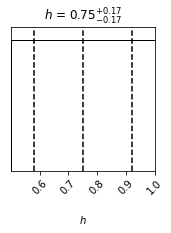

In [17]:
# Plot it.
figure = corner.corner(AllParams_tran, labels=[r"$h$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})